# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])

In [4]:
df = pd.merge(df, pd.DataFrame({'total_EOS' : df[df.token == 'EOS'].groupby('account')['amount'].sum()}), on='account').reset_index()
df['amount_ratio'] = df['amount']/df['total_EOS']

In [5]:
df

,index,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action,total_EOS,amount_ratio
0,0,eosio.vpay,2022-10-24 00:00:02,2022-10-24 00:00:02,135.7596,EOS,eosio.vpay,eosvenezuela,274786211,7c5164317624b8793d0988ffde87e38e762d197616dfa4...,producer vote pay,eosio.token,transfer,78343.1876,0.001733
1,1,eosio.vpay,2022-10-24 00:03:51,2022-10-24 00:03:51,707.8004,EOS,eosio.vpay,newdex.bp,274786669,5111bf06550ae4f49ccb573f6e21cd5466c94d521f849e...,producer vote pay,eosio.token,transfer,78343.1876,0.009035
2,2,eosio.vpay,2022-10-24 00:04:30,2022-10-24 00:04:30,650.3109,EOS,eosio.vpay,aus1genereos,274786747,2e05773a148e569bd8210c20adbba070020dd38d62b529...,producer vote pay,eosio.token,transfer,78343.1876,0.008301
3,3,eosio.vpay,2022-10-24 00:27:38,2022-10-24 00:27:38,604.6785,EOS,eosio.vpay,starteosiobp,274789518,c1539862a311cf4f2dd89abb9d74016343e5db6a67848e...,producer vote pay,eosio.token,transfer,78343.1876,0.007718
4,4,eosio.vpay,2022-10-24 00:36:03,2022-10-24 00:36:03,542.2193,EOS,eosio.vpay,bitfinexeos1,274790528,d66f79a507d9d833200cd96b7660a624d95517e2c92352...,producer vote pay,eosio.token,transfer,78343.1876,0.006921
5,5,eosio.vpay,2022-10-24 01:23:48,2022-10-24 01:23:48,674.1050,EOS,eosio.vpay,eosflytomars,274796256,c31feace2bc8de5df0db5d5e7f59e16fb5e7e65ce1f15a...,producer vote pay,eosio.token,transfer,78343.1876,0.008605
6,6,eosio.vpay,2022-10-24 01:41:24,2022-10-24 01:41:24,560.0733,EOS,eosio.vpay,eoslaomaocom,274798366,d0abe0c428f2276dacbf78fec0e0b2acd7cd18f2775d1c...,producer vote pay,eosio.token,transfer,78343.1876,0.007149
7,7,eosio.vpay,2022-10-24 02:31:00,2022-10-24 02:31:00,664.5367,EOS,eosio.vpay,eosnationftw,274804318,911288302bce8a22b2d44f9d06ca9567a283f47db7c2a6...,producer vote pay,eosio.token,transfer,78343.1876,0.008482
8,8,eosio.vpay,2022-10-24 02:39:13,2022-10-24 02:39:13,192.4379,EOS,eosio.vpay,eosriobrazil,274805304,f79afc9adc70c2fa03afbc1e17567023f94fd133cfe87b...,producer vote pay,eosio.token,transfer,78343.1876,0.002456
9,9,eosio.vpay,2022-10-24 02:42:08,2022-10-24 02:42:08,222.2529,EOS,eosio.vpay,hexlantttttt,274805655,61aa5450ead457fae41a3bac2f26a82716ac3c45711f12...,producer vote pay,eosio.token,transfer,78343.1876,0.002837


In [6]:
from pysankey import sankey

 The following arguments are deprecated and should be removed: figSize in sankey()


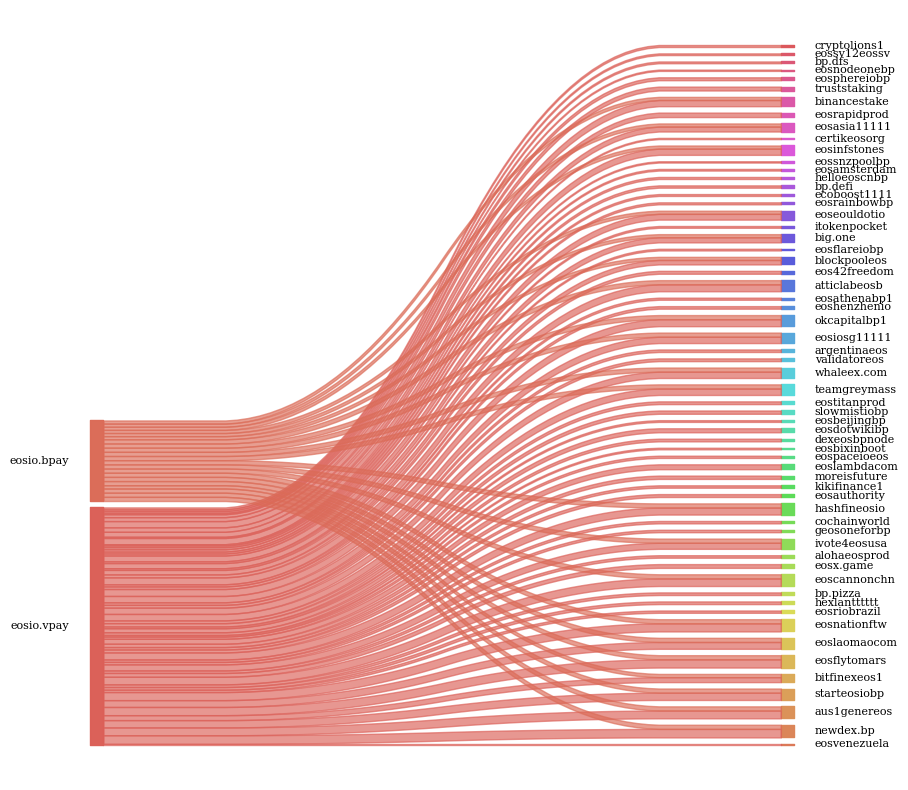

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
      left=df['from'], right=df['to'],
      rightWeight=weight, leftWeight=weight, aspect=2, fontsize=8, figSize=(10, 10)
)